# Проект "Анализ товарного ассортимента"

План работы:

1. Знакомство с данными
2. Предобработка данных
- привести формат даты в соответствие
- проверить датасет на дубликаты и пропуски
- проверить уникальыне значения
3. Исследователький анализ
- определить начало и конец исследуемого периода
- добавление дополнительных столбцов по дням недели и месяцам
- добавить столбец с категорией по столбцу product
- найти аномалии по количеству продуктов в заказе
- добавить столбцы с кластеризацией по столбцам price и quantity на основной, дополнительный, вывод из ассортимента
- найти ТОП 5 продуктов по выручке и по количество в покупках
- построить графики 
- сформулировать и проверить гипотезы (различие между основной и дополнительной категорией)
4. Выводы и рекомендации
5. Подготовить презентацию
6. Постоить дэшборд

Описание данных:

- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара

### Знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [4]:
df.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


In [5]:
display(df)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


Вывод по разделу : 

Датасет df сотсоит из 6737 строк и 6 колонок, данные в форматах int, object и float. Среднее значение по количеству 2.5, минимальное - 1, максимальное  - 1000.  Среднее значение цены 462, минимальное - 9, максимальное 14917.

### Предобработка данных

###### Приведем формат даты в соответствие

In [6]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d%H')

###### Проверим датасет на пропуски

In [7]:
display(df.isna().sum())

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

###### Приведем названия продуктов в столбце product к нижнему регистру

In [8]:
df['product'] = df['product'].str.lower()

###### Поменяем формат столбцов

In [9]:
df['price'] = df['price'].astype(int)
df['quantity'] = df['quantity'].astype(int)

In [10]:
df['quantity'].unique()

array([   1,   10,   96,   15,    6,   11,    2,    4,    3,    5,   37,
         64,   25,  150,   50,   30,   17,    8,    9,    7,  170,   16,
        140,   27,   20,   12,   13,   24,  100,  200,   57,   40,   45,
         29,   23,   43,   14,   31,   59,   60,   18,   26,  300,   70,
        334, 1000,   22,   80,   65])

###### Проверим датасет на явные дубликаты

In [11]:
print(df[['customer_id','order_id', 'product', 'quantity', 'price']].duplicated().sum())

1864


In [12]:
df = df.drop_duplicates(subset=['customer_id','order_id', 'product', 'quantity', 'price'], keep='first')
df.sort_values(by='quantity', ascending=False)

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51
...,...,...,...,...,...,...
2107,2019-03-01 14:00:00,9650580f-4b5d-43a9-b93f-8598337d2948,14555,пеларгония розебудная margaretha укорененный ч...,1,135
2108,2019-03-01 14:00:00,9650580f-4b5d-43a9-b93f-8598337d2948,14555,пеларгония розебудная mary укорененный черенок,1,135
2109,2019-03-01 14:00:00,9650580f-4b5d-43a9-b93f-8598337d2948,14555,пеларгония розебудная prins nikolai укорененны...,1,135
2110,2019-03-01 14:00:00,9650580f-4b5d-43a9-b93f-8598337d2948,14555,пеларгония розебудная queen ingrid укорененный...,1,135


###### Найдем неявные дубликаты в столбце product

In [61]:
df['product'].unique()

array(['комнатное растение в горшке алое вера, d12, h30',
       'комнатное растение в горшке кофе арабика, d12, h25',
       'радермахера d-12 см h-20 см', ...,
       'сушилка для белья на ванну freudenberg (gimi) alablock varadero silver a4p',
       'каланхое каландива малиновое d-7 см', 'литопс микс d-5 см'],
      dtype=object)

In [59]:
duplicates = ['муляж груша мини 2 шт желтая 4 см']
name = ['муляж груша мини 2 шт, желтая 4 см']
df['product'] = df['product'] .replace(duplicates, name)
duplicates = ['набор вешалок для костюма 45 см 4 шт цвет кремовый attribute ahp224']
name = ['набор вешалок для костюма 45см 4шт цвет: кремовый, attribute, ahp224']
df['product'] = df['product'] .replace(duplicates, name)
duplicates = ['пеларгония зональная розоцветная ред розебад']
name = ['пеларгония зональная розоцветная ред розебад (red rosebud)']
df['product'] = df['product'] .replace(duplicates, name)
duplicates = ['сушилка для белья потолочная zalger lift basic 1520 200 см 10 м']
name = ['сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м']
df['product'] = df['product'] .replace(duplicates, name)
duplicates = ['сушилка для белья потолочно-настенная gimi lift 240 5031']
name = ['сушилка для белья потолочно-настенная gimi lift 240, 5031']
df['product'] = df['product'] .replace(duplicates, name)
duplicates = ['чайник эмалированный metalloni со свистком и керамической ручкой "французский шарм" 2,5 л em-250x1/28']
name = ['чайник эмалированный metalloni со свистком и керамической ручкой французский шарм 2,5 л em-250x1/28']
df['product'] = df['product'] .replace(duplicates, name)

###### Сгруппируем данные по номеру заказа, чтобы выявить аномалию (аномальное количество товаров в конкретном заказе). Отсортируем данные по убыванию

In [16]:
grouped_orders = df.groupby('order_id', as_index=False).agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False)
display(grouped_orders.head(10))

,order_id,quantity
2045,71743,1000
2008,71668,334
405,68611,300
1912,71478,300
800,69289,200
534,68815,170
2610,72845,160
1597,70841,150
542,68831,140
722,69156,101


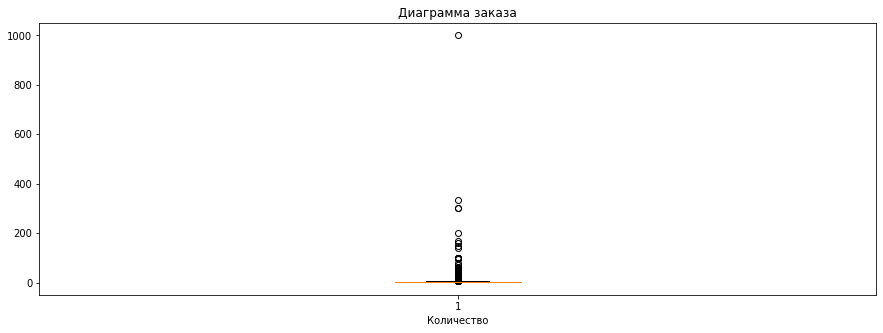

In [17]:
plt.figure(figsize=(15,5))
plt.boxplot(grouped_orders['quantity'])
plt.title('Диаграмма заказа')
plt.xlabel('Количество')
plt.show()

###### Сделаем срез по заказу  с аномальным значением и узнаем какие товары были куплены и в каком количестве

In [56]:
df.query('quantity==1000')[['order_id','product', 'quantity']].sort_values(by='order_id', ascending=False).head(20)

,order_id,product,quantity
5456,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000


Итак, в трех заказах - 71743 было куплено 1000 вантузов. Возможно эти покупки были совершены оптовыми покупателями, но для более  ровных данных удалим эти данные из датасета

In [57]:
df_new = df.query('quantity!=1000')
df_new

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112
...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157


 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

Вывод по разделу:

По 2 разделу привели формат даты в соответствие. В датасете 6737 строк. Проверили датасет на пропуски - 0 пропущенных значений. Привели названия продуктов к нижнему регистру. Проверили датасет на явные дубликаты  - 1864. После удаления осталось 4873 строки. Заменены неявные дубликаты с столбце product. Удалено аномальное значение по заказу 71743 - 1000 вантузов. После удаления осталось 4872 строки. Приведен в соответствие формат цены из float в int. Проверены уникальные значения по столбцам: price, product, customer_id, order_id, quantity. 

### Исследовательский анализ

###### Определим начало и конец исследуемого периода

In [62]:
print('Начало исследуемого периода:', df_new['date'].min())
print('Окончание исследуемого периода:', df_new['date'].max())

Начало исследуемого периода: 2018-10-01 00:00:00
Окончание исследуемого периода: 2019-10-31 14:00:00


###### Добавим новые столбцы в датасет - month, weekday, hour, key_word

In [63]:
df_new['month'] = pd.to_datetime(df_new['date']).dt.month
df_new['weekday'] = pd.to_datetime(df_new['date']).dt.weekday
df_new['year'] = pd.to_datetime(df_new['date']).dt.year
df_new['hour']= pd.to_datetime(df_new['date']).dt.hour
df_new['key_word'] = df_new['product'].str.split(' ').str[0]

###### Разобьем ключевые слова по категориям на группы

In [64]:
food = ['табак','кофе','овощной', 'травы']
home = ['настенная', 'чехол', 'вешалка', 'сушилка', 'крючок', 'корзина', 'доска', 'сумка-тележка', 'муляж', 'щетка-сметка', 'сумка', 'коврик', 'подкладка', 'мусорный', 'ковер', 'гладильная', 'готовая', 'искусственный', 'штора', 'декоративная', 'плечики', 'салфетка', 'вкладыши', 'кофр', 'щетка', 'щетка-утюжок', 'светильник', 'контейнер', 'веник', 'ящик', 'подголовник', 'ведро', 'короб', 'коробка', 'насадка', 'вешалка-плечики', 'настольная', 'сиденье', 'утюг', 'корыто', 'шнур', 'урна', 'сметка', 'лопатка', 'салфетница', 'вешалка-стойка', 'лоток', 'вешалки', 'фен', 'универсальное', 'сменный', 'термометр', 'скребок', 'сетка', 'подставка', 'вешалка-сушилка', 'новогоднее', 'защитный', 'многофункциональный', 'фоторамка', 'ключница', 'защитная', 'гипоаллергенный', 'вешалка-перекладина', 'махровое', 'искусственная', 'совок', 'насадка-отжим', 'нетканые', 'пылесос', 'штанга', 'подарочный', 'махровый', 'бак', 'окномойка', 'урна-пепельница', 'сменная', 'ткань', 'насадка-моп', 'подвесное', 'автоматическая', 'бельевые', 'отжим', 'пряные', 'антинакипин', 'корзинка', 'ваза', 'прищепки', 'пьезозажигалка', 'запасная', 'щётка', 'универсальный', 'вакуумный']
kitchen = ['мини-сковорода', 'сковорода', 'стеклянная', 'тарелка', 'вилка', 'ложка', 'нож', 'котел', 'набор', 'скатерть', 'кувшин', 'толкушка', 'чайник', 'банка', 'противень', 'миксер', 'чистящий', 'tepмокружка', 'подрукавник', 'ножеточка', 'масленка', 'сервировочная', 'салатник', 'чайный', 'рыбочистка', 'овощеварка', 'терка', 'кружка', 'стакан', 'столовая', 'чайная', 'овощечистка', 'пробка', 'измельчитель', 'антижир', 'мантоварка', 'ролик', 'ковш', 'кухонные', 'кисточка', 'картофелемялка', 'жестяная', 'ополаскиватель', 'весы', 'миска', 'пресс', 'термостакан', 'термокружка', 'термос', 'фарфоровая', 'электроштопор', 'столовый', 'блюдце', 'бульонница', 'разделочная', 'мантоварка-пароварка', 'складная', 'емкость', 'просеиватель', 'кастрюля', 'хлебница', 'форма', 'орехоколка', 'кухонное', 'скалка', 'венчик', 'сито', 'тортница', 'блюдо', 'тряпкодержатель', 'сотейник', 'бидон', 'складной', 'отделитель', 'шприц', 'крышка', 'мешок', 'сахарница', 'соковарка', 'соковыжималка', 'половник', 'кипятильник', 'основание', 'мерный']
furniture = ['лестница-стремянка', 'петля', 'карниз', 'петля-стрела', 'комод', 'этажерка', 'полки', 'модульная', 'лестница', 'полка', 'обувница-3', 'стеллаж', 'завертка', 'ручка', 'шпингалет']
bedroom = ['простыня', 'подушка', 'ковёр', 'наматрасник', 'наматрицник-чехол', 'халат', 'средство', 'покрывало', 'одеяло', 'простынь', 'наматрацник', 'наволочка', 'пододеяльник', 'двуспальное']
flowers = ['радермахера', 'хризолидокарпус', 'циперус', 'шеффлера', 'юкка', 'пеларгония', 'эхеверия', 'адиантум', 'кампанула', 'калатея', 'хлорофитум', 'цикламен', 'глоксиния', 'азалия', 'гортензия', 'хризантема', 'сантолина', 'аспарагус', 'афеляндра', 'антуриум', 'фиалка', 'гербера', 'роза', 'бегония', 'бальзамин', 'крассула', 'артемизия', 'лаванда', 'каланхое', 'примула', 'дендробиум', 'калоцефалус', 'каллуна', 'капсикум', 'мимоза', 'соланум', 'бархатцы', 'космея', 'настурция', 'петуния', 'алиссум', 'гвоздика', 'годеция', 'календула', 'кореопсис', 'лапчатка', 'львиный', 'флокс', 'цинерария', 'эшшольция', 'диффенбахия', 'фаленопсис', 'подсолнечник', 'аптения', 'пуансеттия', 'скиммия', 'фиттония', 'алоэ', 'спатифиллум', 'фикус', 'эхинокактус', 'гипсофила', 'калибрахоа', 'эпипремнум', 'аквилегия', 'седум', 'нефролепис', 'тюльпан', 'гиацинт', 'вербена', 'однолетнее', 'чабер', 'ранункулус', 'овсянница', 'георгина', 'смолевка', 'цинния', 'вербейник', 'виола', 'колокольчик', 'котовник', 'ясколка', 'платикодон', 'энотера', 'фуксия', 'цитрофортунелла', 'пеперомия', 'синнингия', 'гардения', 'лобелия', 'мускари', 'пиретрум', 'муррайя', 'астра', 'драцена', 'фатсия', 'монарда', 'рудбекия', 'барвинок', 'сциндапсус', 'камнеломка', 'солидаго', 'физостегия', 'бадан', 'лантана', 'лаватера', 'анемона', 'буддлея', 'любисток', 'хамедорея', 'мединилла', 'импатиенс', 'замиокулькас', 'амариллис', 'пахира']
renovation = ['стремянка', 'стяжка', 'комплект', 'крепеж', 'пружина', 'стремянки', 'сверло-фреза,', 'холодная', 'измерительный', 'линейка,', 'бензин', 'шило', 'рассекатель', 'ручка-скоба', 'стремянка-табурет', 'кольца', 'фал', 'штангенциркуль', 'рукав', 'сверло', 'фиксатор-шар', 'портулак', 'шпагат', 'покрытие', 'веревка', 'решетка', 'уголок', 'стяжки']
garden = ['комнатное', 'многолетнее', 'рассада', 'герань', 'суккулент', 'эвкалипт', 'цветок', 'тележка', 'нолина', 'мирт', 'цветущее', 'кориандр', 'иссоп', 'молодило', 'душица', 'мелисса', 'розмарин', 'альбука', 'мята', 'морковь', 'огурец', 'капуста', 'пуансетия', 'гиностемма', 'ель', 'кипарисовик', 'тимьян', 'кодонанта', 'цикламен,', 'гимнокалициум', 'крокусы', 'базилик', 'горох', 'земляника', 'незабудка', 'томат', 'укроп', 'калла', 'декабрист', 'бакопа', 'газания', 'лавр', 'эхинацея', 'лилейник', 'папоротник', 'дыня', 'циния', 'томата', 'девичий', 'агератум', 'колеус', 'тагетис', 'цинерания', 'аргирантерум', 'левкой', 'вероника', 'целозия', 'арбуз', 'баклажан', 'клубника', 'патиссон', 'маттиола', 'сальвия', 'лук', 'джункус', 'хоста', 'гайлардия', 'нивянник', 'осина', 'бузульник', 'лен', 'валериана', 'змееголовник', 'петрушка', 'сельдерей', 'шалфей', 'вигна', 'кабачок', 'тыква', 'зверобой', 'клен', 'салат', 'литопс']
bathroom = ['таз', 'ерш', 'дозатор', 'ёрш', 'плед', 'перчатки', 'полотенце', 'стиральный', 'жидкое', 'пена', 'зубная', 'швабра', 'мыло', 'паста', 'держатель', 'губка', 'ароматизированное', 'бальзам', 'мыльница', 'вантуз', 'кондиционер', 'увлажняющая', 'мыло-скраб', 'концентрат', 'ванна', 'отбеливатель', 'тряпка']

###### Напишем функцию для категоризации товаров и создадим новый столбец category

In [65]:
def categorize(category):
    try:
        if category in kitchen:
            return 'кухня'
        elif category in home:
            return 'дом'
        elif category in garden:
            return 'сад'
        elif category in bathroom:
            return 'ванная'
        elif category in furniture:
            return 'мебель'
        elif category in bedroom:
            return 'спальня'
        elif category in flowers:
            return 'цветы'
        elif category in food:
            return 'еда'
        elif category in renovation:
            return 'ремонт'
    except:
        pass
    
df_new['category'] = df_new['key_word'].apply(categorize)

In [66]:
df_new.sort_values(by = 'category', ascending=False)

,date,customer_id,order_id,product,quantity,price,month,weekday,year,hour,key_word,category
2107,2019-03-01 14:00:00,9650580f-4b5d-43a9-b93f-8598337d2948,14555,пеларгония розебудная margaretha укорененный ч...,1,135,3,4,2019,14,пеларгония,цветы
5563,2019-06-24 15:00:00,b975add8-83bc-4b4a-aae2-8c48829ee519,14874,"петуния гибридная ампельная, диам. 12 см",1,142,6,0,2019,15,петуния,цветы
2320,2019-03-13 19:00:00,bd57cbda-03d8-4758-85e3-b9c671b6bca0,14572,пеларгония розебудная red pandora укорененный ...,1,135,3,2,2019,19,пеларгония,цветы
2322,2019-03-14 05:00:00,af96cc67-1726-43ba-bca1-1da7b78cb33a,70726,пеларгония розебудная red pandora укорененный ...,2,134,3,3,2019,5,пеларгония,цветы
2323,2019-03-14 07:00:00,95d61179-404e-4ebd-9762-29d800b1583e,70726,пеларгония розебудная red pandora укорененный ...,2,134,3,3,2019,7,пеларгония,цветы
...,...,...,...,...,...,...,...,...,...,...,...,...
272,2018-10-16 14:00:00,14891ee0-b828-4ea3-8566-6d4cac339de5,68663,"таз пластмассовый со стиральной доской (иж), 1...",1,397,10,1,2018,14,таз,ванная
6088,2019-08-13 10:00:00,b18c373d-fcb4-4d14-8425-f26f21f52158,72275,"таз пластмассовый 30,0 л овальный пц2913, 1404051",1,404,8,1,2019,10,таз,ванная
2972,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71207,"таз пластмассовый строительный круглый 40 л, 1...",3,188,4,4,2019,19,таз,ванная
1213,2018-12-15 15:00:00,b671b176-6d01-43f4-a168-a22ef061b2fd,69375,"ёрш унитазный с деревянной ручкой , ваир 1712012",1,59,12,5,2018,15,ёрш,ванная


###### Узнаем какая категория приносит больше прибыли

In [67]:
category_by_price = df_new.groupby('category', as_index = False).agg({'price':'sum'})\
.rename(columns={'price':'total_amount'}).sort_values(by='total_amount', ascending=False)
display(category_by_price)

,category,total_amount
1,дом,1581284
8,цветы,229440
3,кухня,197628
6,сад,191061
5,ремонт,112776
4,мебель,94845
0,ванная,57345
7,спальня,42478
2,еда,844


<AxesSubplot:xlabel='category', ylabel='total_amount'>

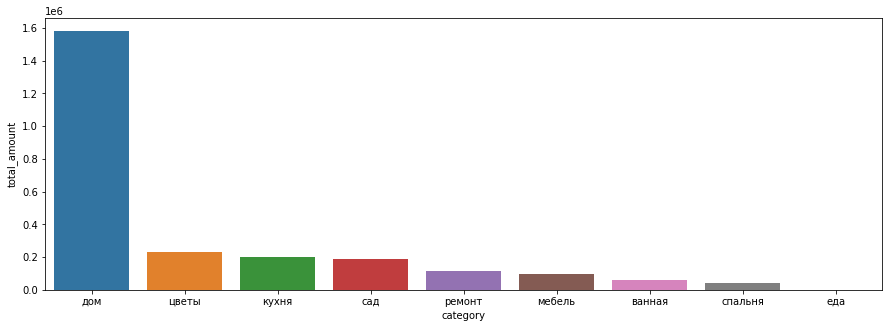

In [69]:
plt.subplots(figsize=(15,5))
sns.barplot(data=category_by_price, x='category', y='total_amount')

###### Узнаем товары какой категории больше всего пользуются спросом

In [70]:
category_by_quantity = df_new.groupby('category', as_index = False).agg({'quantity':'sum'})\
.rename(columns={'quantity':'total_quantity'}).sort_values(by='total_quantity', ascending=False)
display(category_by_quantity)

,category,total_quantity
1,дом,5643
8,цветы,2165
6,сад,1994
3,кухня,1310
5,ремонт,874
0,ванная,420
4,мебель,324
7,спальня,81
2,еда,16


<AxesSubplot:xlabel='category', ylabel='total_quantity'>

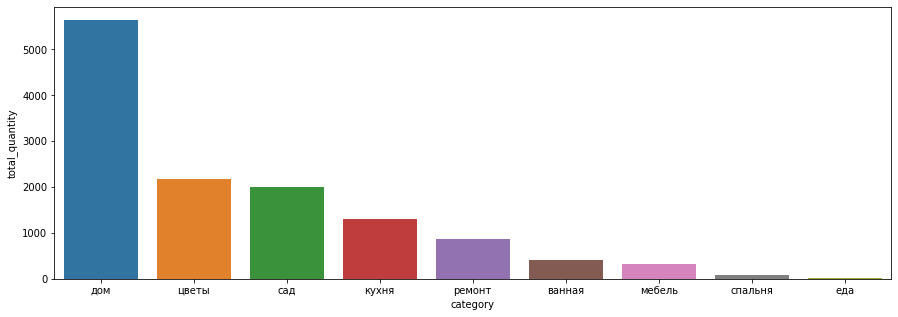

In [71]:
plt.subplots(figsize=(15,5))
sns.barplot(data=category_by_quantity, x='category', y='total_quantity')

###### Визуализируем на диаграмме рассеяния соотношение количества и цены товара

<AxesSubplot:xlabel='quantity', ylabel='price'>

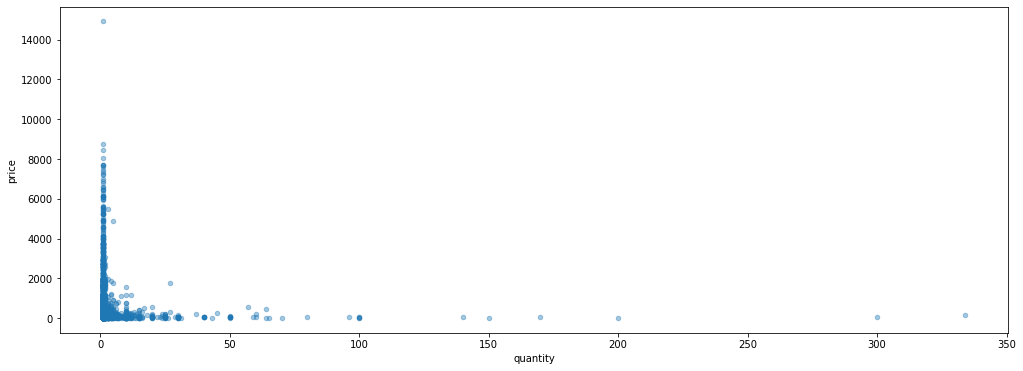

In [29]:
df_new.plot(x='quantity', y='price', kind='scatter', alpha=0.4, figsize=(17,6))

В датасете количество товаров варьируется от 1 до 350. 90% товаров находится в диапазоне от 1 до 30 (количество товарных единиц). В основном в датасете товаров по 1-2-3 единицы. Стоимость товаров варируется от 9 до 16 000, основная часть товаров варьируется от 1 до 6-8 тыс. 

###### Визуализируем на столбчатой диаграмме распределение покупок по дням

In [72]:
groped_by_weekday = df_new.groupby('weekday', as_index=False).agg({'order_id':'count'}).rename(columns = {'order_id':'quantity'})
display(groped_by_weekday)

,weekday,quantity
0,0,870
1,1,805
2,2,717
3,3,786
4,4,633
5,5,473
6,6,588


<AxesSubplot:xlabel='weekday'>

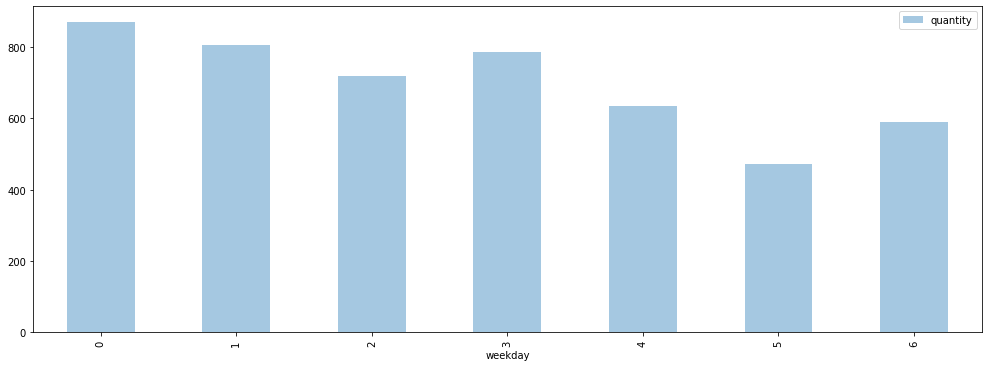

In [73]:
groped_by_weekday.plot(x='weekday', y='quantity', kind='bar', alpha=0.4, figsize=(17,6))

Больше всего заказов совершается в пн(870) и вт(805), чуть меньше в ср, наименьшее число заказов по дням делается в сб (473)

###### Визуализируем на столбчатой диаграмме распределение покупок по часам

In [74]:
groped_by_hour = df_new.groupby('hour', as_index=False).agg({'order_id':'count'}).rename(columns = {'order_id':'quantity'})
display(groped_by_hour)

,hour,quantity
0,0,50
1,1,41
2,2,16
3,3,7
4,4,25
5,5,36
6,6,28
7,7,83
8,8,240
9,9,320


<AxesSubplot:xlabel='hour'>

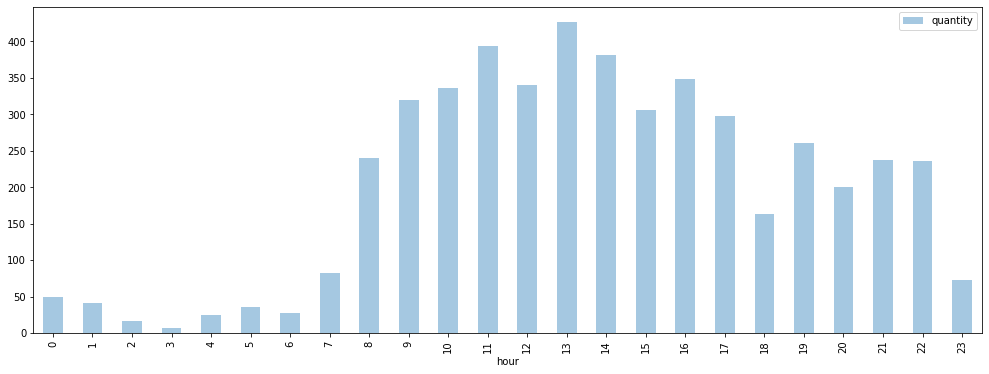

In [33]:
groped_by_hour.plot(x='hour', y='quantity', kind='bar', alpha=0.4, figsize=(17,6))

Наибольшее количество покупок делается в 9, 13, 14 и 16 часов. Наименьшее в ночное время - с 0 до 6 утра.

###### Визуализируем на столбчатой диаграмме распределение покупок по месяцам

In [75]:
groped_by_month = df_new.groupby(['month','year'], as_index=False).agg({'order_id':'count'}).rename(columns = {'order_id':'quantity'})
display(groped_by_month)

,month,year,quantity
0,1,2019,186
1,2,2019,363
2,3,2019,418
3,4,2019,677
4,5,2019,737
5,6,2019,306
6,7,2019,313
7,8,2019,202
8,9,2019,221
9,10,2018,484


<AxesSubplot:xlabel='month'>

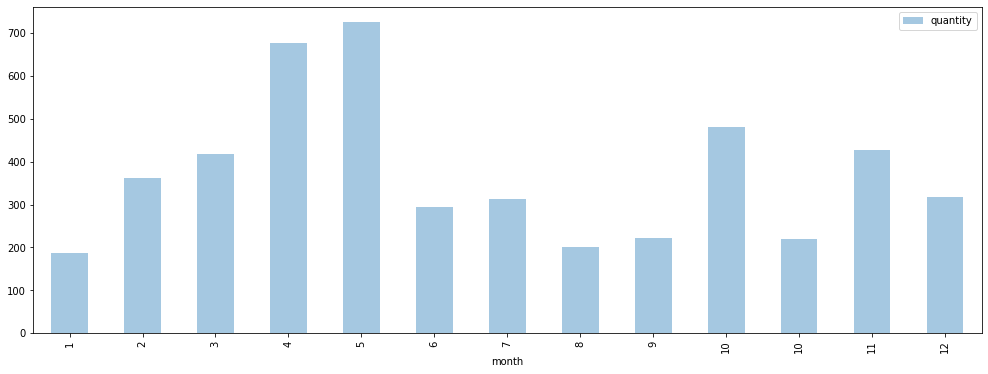

In [35]:
groped_by_month.query('quantity!=250').plot(x='month', y='quantity', kind='bar', alpha=0.4, figsize=(17,6))

Наибольшее число заказов в апреле, мае. Наименьшее в январе, августе, сентябре и октябре

###### Проведем ABC, сгруппируем датасет по товарам

In [76]:
total_grouped = df_new.groupby('product', as_index=False).agg({'price':'sum', 'quantity':'sum'})\
.rename(columns={'price':'total_amount','quantity':'total_quantity'})
display(total_grouped)

,product,total_amount,total_quantity
0,tepмокружка avex freeflow 700 мл зеленый avex0759,2399,1
1,tepмокружка avex freeflow 700 мл сталь avex0776,2399,1
2,tepмокружка avex recharge 500 мл голубой avex0681,4198,2
3,автоматическая щетка leifheit для мытья окон с...,7229,1
4,агератум рассада однолетних цветов в кассете п...,210,2
...,...,...,...
2329,ёрш радиаторный без ручки 1807007,60,2
2330,"ёрш унитазный пластмассовый, ваир 1712002",44,1
2331,"ёрш унитазный с деревянной ручкой , ваир 1712012",452,103
2332,"ёрш унитазный с подставкой wc ""люкс"", мультипл...",112,3


###### Выведем перцентиль по итоговой сумме товара, напишем функцию для определения кластера по сумме товара:

In [77]:
percentile_price = np.percentile(total_grouped['total_amount'], [20,80])
perc_20 = percentile_price[0]
perc_80 = percentile_price[1]
percentile_price

array([  97., 1349.])

In [78]:
def cluster_price(i):
    try:
        if i>perc_80:
            return 'Основной'
        elif i<perc_20:
            return 'Исключить'
        else:
            return 'Дополнительный'
    except:
        pass
    
total_grouped['cluster_price'] = total_grouped['total_amount'].apply(cluster_price)

###### Выведем перцентиль по итоговому количеству товара, напишем функцию для определения кластера по количеству товара:

In [79]:
percentile_quantity = np.percentile(total_grouped['total_quantity'], [20,80])
perce_20 = percentile_quantity[0]
perce_80 = percentile_quantity[1]
percentile_quantity

array([1., 5.])

In [80]:
def cluster_quantity(i):
    try:
        if i>perce_80:
            return 'Основной'
        elif i<=perce_20:
            return 'Исключить'
        else:
            return 'Дополнительный'
    except:
        pass
    
total_grouped['cluster_quantity'] = total_grouped['total_quantity'].apply(cluster_quantity)

In [41]:
display(total_grouped)

,product,total_amount,total_quantity,cluster_price,cluster_quantity
0,tepмокружка avex freeflow 700 мл зеленый avex0759,2399,1,Основной,Исключить
1,tepмокружка avex freeflow 700 мл сталь avex0776,2399,1,Основной,Исключить
2,tepмокружка avex recharge 500 мл голубой avex0681,4198,2,Основной,Дополнительный
3,автоматическая щетка leifheit для мытья окон с...,7229,1,Основной,Исключить
4,агератум рассада однолетних цветов в кассете п...,210,2,Дополнительный,Дополнительный
...,...,...,...,...,...
2326,ёрш радиаторный без ручки 1807007,60,2,Исключить,Дополнительный
2327,"ёрш унитазный пластмассовый, ваир 1712002",44,1,Исключить,Исключить
2328,"ёрш унитазный с деревянной ручкой , ваир 1712012",452,103,Дополнительный,Основной
2329,"ёрш унитазный с подставкой wc ""люкс"", мультипл...",112,3,Дополнительный,Дополнительный


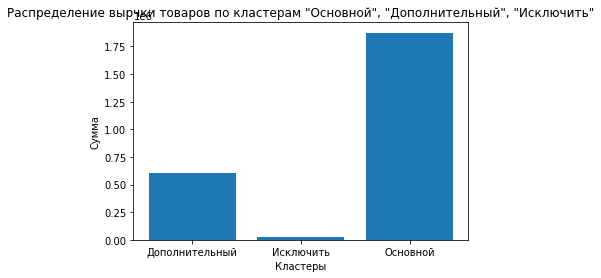

In [42]:
total_grouped_price = total_grouped.groupby('cluster_price', as_index=False).agg({'total_amount':'sum'})
plt.bar(total_grouped_price['cluster_price'],total_grouped_price['total_amount'])
plt.title('Распределение вырчки товаров по кластерам "Основной", "Дополнительный", "Исключить"')
plt.ylabel('Сумма')
plt.xlabel('Кластеры')
plt.show()

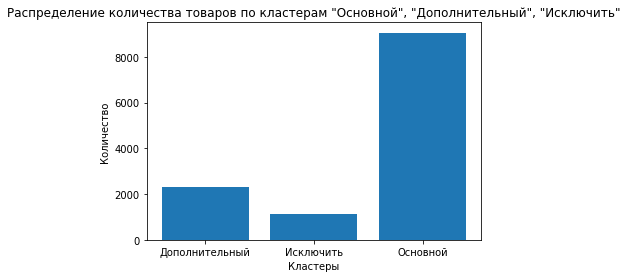

In [43]:
total_grouped_quantity = total_grouped.groupby('cluster_quantity', as_index=False).agg({'total_quantity':'sum'})
plt.bar(total_grouped_quantity['cluster_quantity'],total_grouped_quantity['total_quantity'])
plt.title('Распределение количества товаров по кластерам "Основной", "Дополнительный", "Исключить"')
plt.ylabel('Количество')
plt.xlabel('Кластеры')
plt.show()

###### Выведем ТОП 5 товаров по наибольшей сумме:

In [44]:
top_5_by_price = total_grouped.sort_values(by = 'total_amount',ascending=False).head(5)
top_5_by_price[['product', 'total_amount']]

,product,total_amount
1603,сумка-тележка 2-х колесная gimi argo синяя,50405
1629,сумка-тележка хозяйственная andersen scala sho...,28045
1614,сумка-тележка 3-х колесная gimi tris floral синяя,18893
1634,сумка-тележка хозяйственная andersen treppenst...,18560
1632,сумка-тележка хозяйственная andersen scala sho...,18296


<AxesSubplot:xlabel='total_amount', ylabel='product'>

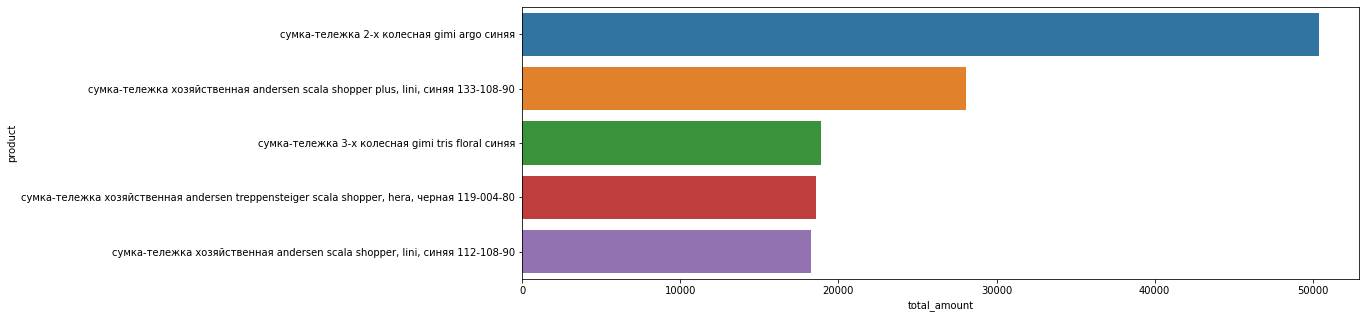

In [45]:
plt.subplots(figsize=(15,5))
sns.barplot(data=top_5_by_price, y='product', x='total_amount')

###### Выведем ТОП 5 товаров по наибольшеve количеству:

In [46]:
top_5_by_quantity = total_grouped.sort_values(by = 'total_quantity',ascending=False).head(5)
top_5_by_quantity[['product','total_quantity']]

,product,total_quantity
827,муляж яблоко 9 см красное,618
184,вешалки мягкие для деликатных вещей 3 шт шоколад,335
829,муляж яблоко зеленый 9 см полиуретан,308
1438,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200
1104,плечики пластмассовые размер 52 - 54 тула 1205158,160


<AxesSubplot:xlabel='total_quantity', ylabel='product'>

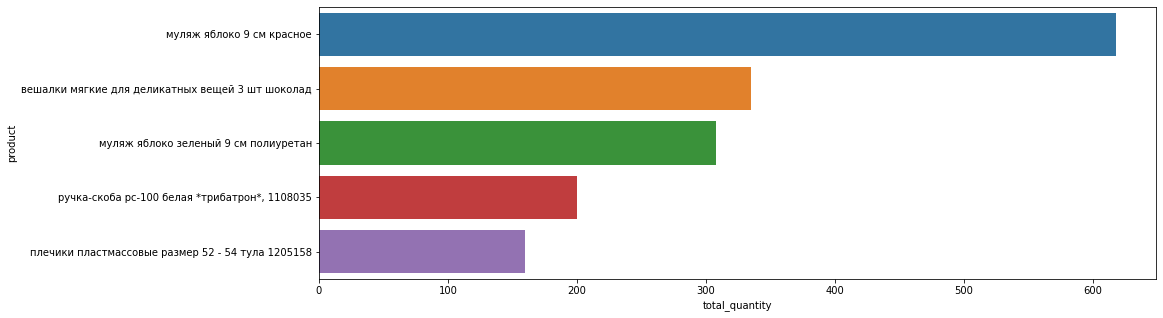

In [47]:
plt.subplots(figsize=(15,5))
sns.barplot(data=top_5_by_quantity, y='product', x='total_quantity')

In [48]:
print('Товары на вывод из ассортимента', total_grouped.loc[(total_grouped['cluster_quantity']=='Исключить')&(total_grouped['cluster_price']=='Исключить')]['product'].count())

product_for_out = total_grouped.loc[(total_grouped['cluster_quantity']=='Исключить') & (total_grouped['cluster_price']=='Исключить')]['product']

display(product_for_out)

Товары на вывод из ассортимента 219


32                        арбуз огонек раннеспелый d-7 см
33                арбуз сибирские огни раннеспелый d-7 см
34                      арбуз холодок позднеспелая d-7 см
35                    арбуз шуга бейби раннеспелый d-7 см
37      ароматизированное средство дудаления известков...
                              ...                        
2296       щетка-сметка с пластиковой ручкой лаура sv3020
2302                  эвкалипт сильвердроп d-7 см h-30 см
2303                 эвкалипт сильвердроп в горшке d-7 см
2327            ёрш унитазный пластмассовый, ваир 1712002
2330    ёрш унитазный с подставкой wc "стандарт", муль...
Name: product, Length: 219, dtype: object

Вывод по разделу:

Предоставлен датасет за период с 01/10/2018 по 31/10/2019. Добавлены новые столбцы month, weekday, hour и key_word(ключевое слово). Категории по выручке:

дом(1 581 284), цветы(229 440), кухня(197 628), сад(191 061), ремонт (112 776), мебель(94 845), ванная (57 345), спальня	(42 478), еда (844)

Категории по количеству:

дом(5643), цветы(2165), сад(1994), кухня(1310), ремонт(874),ванная	(420), мебель(324), спальня(81), еда(16)

В датасете количество товаров варьируется от 1 до 350. 90% товаров находится в диапазоне от 1 до 30 (количество товарных единиц). В основном в датасете товаров по 1-2-3 единицы. Стоимость товаров варируется от 9 до 16 000, основная часть товаров варьируется от 1 до 6-8 тыс.

Больше всего заказов совершается в пн(870) и вт(805), чуть меньше в ср, наименьшее число заказов по дням делается в сб (473). Наибольшее количество покупок делается в 9, 13, 14 и 16 часов. Наименьшее в ночное время - с 0 до 6 утра. Наибольшее число заказов в апреле, мае. Наименьшее в январе, августе, сентябре и октябре.

ТОП 5 товаров по наибольшей выручке:

1. сумка-тележка 2-х колесная gimi argo синяя	50405
2. сумка-тележка хозяйственная andersen scala sho...	28045
3. сумка-тележка 3-х колесная gimi tris floral синяя	18893
4. сумка-тележка хозяйственная andersen treppenst...	18560
5. сумка-тележка хозяйственная andersen scala sho...	18296


ТОП 5 товаров по количеству:

1. муляж яблоко 9 см красное	618
2. вешалки мягкие для деликатных вещей 3 шт шоколад	335
3. муляж яблоко зеленый 9 см полиуретан	308
4. ручка-скоба рс-100 белая *трибатрон*, 1108035	200
5. плечики пластмассовые размер 52 - 54 тула 1205158	160

### Формирование гипотез

###### Сформулируем гипотезы

- нулевая гипотеза: Различий между основной и дополнительной категорией нет
- альтернативная гипотеза: Различия между основной и дополнительной категорией есть

In [49]:
alpha = 0.05
sample_pr_A = total_grouped[total_grouped['cluster_price']=='Основной']['total_amount']
sample_pr_B = total_grouped[total_grouped['cluster_price']=='Дополнительный']['total_amount']

results = st.ttest_ind(sample_pr_A, sample_pr_B, equal_var=False)

print(results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3093795168321329e-64
Отвергаем нулевую гипотезу


<AxesSubplot:>

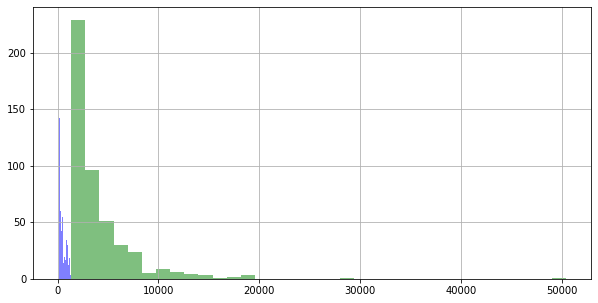

In [50]:
total_grouped[total_grouped['cluster_price']=='Основной']['total_amount'].hist(bins=35, figsize=(10,5), alpha=0.5, color='green')
total_grouped[total_grouped['cluster_price']=='Дополнительный']['total_amount'].hist(bins=35, figsize=(10,5), alpha=0.5, color='blue')

In [51]:
alpha = 0.05
sample_qu_A = total_grouped[total_grouped['cluster_quantity']=='Основной']['total_quantity']
sample_qu_B = total_grouped[total_grouped['cluster_quantity']=='Дополнительный']['total_quantity']

results = st.ttest_ind(sample_qu_A, sample_qu_B, equal_var=False)

print(results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.642290212173868e-18
Отвергаем нулевую гипотезу


<AxesSubplot:>

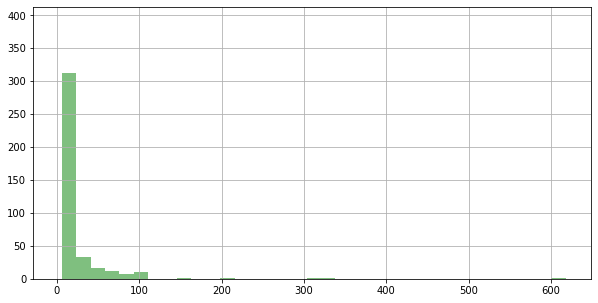

In [52]:
total_grouped[total_grouped['cluster_quantity']=='Основной']['total_quantity'].hist(bins=35, figsize=(10,5), alpha=0.5, color='green')
total_grouped[total_grouped['cluster_quantity']=='Дополнительный']['total_quantity'].hist(bins=35, figsize=(10,5), alpha=0.5, color='blue')

Вывод по разделу:

При проверке гипотез и в первом, и во втором случаях отвергаем нулевую гипотезу о равенстве двух выборок: (1) что основной и дополнительный ассортимент по выручке равны, (2) что основной и дополнительный ассортимент по количеству продаваемых товаров равны.

### Итоговый вывод


Предоставлен датасет за период с 01/10/2018 по 31/10/2019. Добавлены новые столбцы month, weekday, hour и key_word(ключевое слово). Также добавлен новый столбец с категорией товара. 

Выявлены аномальные значения по количеству товара в категориях.В категории ванная есть выброс со значением 1000. Заказы с аномальным количеством товаров были удалены - 71743(1000 вантузов), 14833(900 - рассада), 68611(600 - 300 крепежей для пружины дверной, 300 дверных пружин). Категория "дом" за исследуемый период принесла больше всего прибыли - 1 902 566. На втором месте категория "цветы" - 265 209. Категория "еда" принесла меньше всего по сумме - 888. По количеству самая популярная категория - "дом" (6503) и "цветы" (2520) и "сад" (2278), наименьшее в категории "еда"(18). 

В датасете количество товаров варьируется от 1 до 350. 90% товаров находится в диапазоне от 1 до 30 (количество товарных единиц). В основном в датасете товаров по 1-2-3 единицы. Стоимость товаров варируется от 9 до 14 000, основная часть товаров варьируется от 9 до 6-8 тыс. 

Больше всего заказов совершается в пн и вт, чуть меньше в ср, наименьшее число заказов по дням делается в пт. Наибольшее количество покупок делается в 9, 11, 13 и 16 часов. Наименьшее в ночное время - с 0 до 6 утра.Наибольшее число заказов в апреле, мае и октябре. Наименьшее в январе, августе, сентябре. 

ТОП 5 товаров по прибыльности сумка-тележка 2-х колесная gimi argo красная(76090), сумка-тележка 2-х колесная gimi argo синяя	(65281), сумка-тележка хозяйственная rolser bab010 rojo(49668), сумка-тележка хозяйственная andersen scala sho(33294), гладильная доска ника гранд 122х42 см нг	(28784). 

ТОП 5 товаров по наибольшему количеству: муляж яблоко 9 см красное(618), вешалки мягкие для деликатных вещей 3 шт шоколад(335), муляж яблоко зеленый 9 см полиуретан(308), ручка-скоба рс-100 белая *трибатрон*	(200), плечики пластмассовые размер 52 - 54 тула (160).

При проверке гипотез и в первом, и во втором случаях отвергаем нулевую гипотезу о равенстве двух выборок: (1) что основной и дополнительный ассортимент по выручке равны, (2) что основной и дополнительный ассортимент по количеству продаваемых товаров равны.

Рекомендации: При кластеризации товаров товары были выделены в 3 категории: А, В, С. Товары в категории основного ассотртимерта приносят больше выручки или являются самым ходовым товаром. Товары категории дополнительного ассортимента также приносят прибыль или явяются ходовым товаром по количеству, но в более меньшей степени. Товары в категории на вывод из ассортимента было выявлено 211 товаров на вывод из ассортимента (товары, не приносящие достаточной выручки и не продаются в достаточном количестве). В их числе:

1) аквилегия махровая тауэр смесь окрасок объем 1 л

2) анемона белый объем 0,5 л

3) ароматизированное средство дудаления известков

4) астра альпийская микс объем 1 л

5) базилик овощной арарат в кассете 4 штуки средн

6) щетка палубная 215х80х20 мм 6-рядная без черен

7) щетка-сметка 3-х рядная деревянная 450 мм 

8) эвкалипт сильвердроп d-7 см h-30 см

9)  ёрш унитазный пластмассовый, ваир

10) ёрш унитазный с подставкой wc "стандарт", муль


Ссылки на материалы:


Дэшборд
https://public.tableau.com/views/DianaTaymusheva_dashboard_project_v3/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

Презентация:
https://drive.google.com/file/d/1tGVgxiefSZRxomjLD5kJ3iV30Wimvf8_/view?usp=drive_link